In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage.measure

In [3]:

import copy

child_last   = "└─── "
child_middle = "├─── "
space_pre    = "     "
middle_pre   = "│    "
def build_tree(obj, key='#', level=0, level_info = {}):
    if(level > 0):
        for i in range(level-1):
            if(level_info[i] == 'last'):
                print(space_pre, end="")
            else:
                print(middle_pre, end="")
        if(level_info[level-1] == 'last'):
            child_pre = child_last
        else:
            child_pre = child_middle
        print(child_pre, end="")
    
    if(key != '#'):
        print(key, end=": ")
    print(type(obj), end=" ")
    if(type(obj) is list):
        print("[{}]".format(len(obj)))
    else:
        print()
    if(type(obj) is dict):
        key_arr = list(obj.keys())
        for idx in range(len(key_arr)):
            li = copy.deepcopy(level_info)
            if(idx == len(key_arr)-1):
                li[level] = 'last'
            else:
                li[level] = 'middle'
            
            key = key_arr[idx]
            build_tree(obj[key], key=key, level = level + 1, level_info = li)
    elif(type(obj) is list):
        li = copy.deepcopy(level_info)
        li[level] = 'last'
        build_tree(obj[0], key='#', level = level + 1, level_info = li)

In [4]:
def getSecondFromTimeStamp(timestamp):
    return timestamp["hour"]*60*60 + timestamp["minute"]*60 + timestamp["seconds"]

In [5]:
def gaze__processOneSession(gaze_arr, latest = None):
    xrr = []
    yrr = []
    if(latest != None and len(gaze_arr) > 0):
        endtime = getSecondFromTimeStamp(gaze_arr[-1]["timestamp"])
    for gaze in gaze_arr:
        if(latest != None):
            curr_time = getSecondFromTimeStamp(gaze["timestamp"])
            if(endtime - curr_time > latest):
                continue
        xrr.append(gaze["gaze"]["x"])
        yrr.append(gaze["gaze"]["y"])
    return np.array(xrr), np.array(yrr)

In [19]:
path_root = "/home/arnab/MEGAsync/Research/Attention Tracking/Eye Tracking/Data_Backup/saved_sessions_latest/"

In [20]:
session_name = "session_2021-09-24T10:09:59.226067/session_2021-09-24T10:09:59.226067.json"
session_name = session_name.replace(":", "%3a")
with open(path_root + session_name, 'r') as f:
    session = json.load(f)

In [21]:
build_tree(session)

<class 'dict'> 
└─── hdehheeafrlqlylodn58si: <class 'list'> [240]
     └─── <class 'dict'> 
          ├─── gaze: <class 'dict'> 
          │    ├─── x: <class 'float'> 
          │    └─── y: <class 'float'> 
          ├─── gazefeatures: <class 'dict'> 
          │    ├─── gaze: <class 'list'> [2]
          │    │    └─── <class 'int'> 
          │    └─── screen: <class 'list'> [2]
          │         └─── <class 'int'> 
          ├─── face: <class 'list'> [468]
          │    └─── <class 'list'> [3]
          │         └─── <class 'int'> 
          └─── timestamp: <class 'dict'> 
               ├─── hour: <class 'int'> 
               ├─── minute: <class 'int'> 
               ├─── seconds: <class 'int'> 
               └─── milliseconds: <class 'int'> 


In [22]:
xrr, yrr = gaze__processOneSession(session['hdehheeafrlqlylodn58si'], 10)
xrr.shape, yrr.shape

((124,), (124,))

In [23]:
# marker_track = {
#     "Position 1":   [.5, .5],
#     "Position 2":   [.1, .1],	
#     "Position 3":   [.1, .8],	
#     "Position 4":	[.8, .8],	
#     "Position 5":	[.8, .1],	
# }

accuracy_cords = [
    {'x': 50, 'y': 50},
    {'x': 10, 'y': 10},
    {'x': 10, 'y': 50},
    {'x': 10, 'y': 90},
    {'x': 50, 'y': 10},
    {'x': 50, 'y': 90},
    {'x': 90, 'y': 10},
    {'x': 90, 'y': 50},
    {'x': 90, 'y': 90},
]

marker_track = {}
for i in range(len(accuracy_cords)):
    marker_track["Position {}".format(i+1)] = [accuracy_cords[i]['x']/100, accuracy_cords[i]['y']/100]

print(len(marker_track.keys()))
marker_track

9


{'Position 1': [0.5, 0.5],
 'Position 2': [0.1, 0.1],
 'Position 3': [0.1, 0.5],
 'Position 4': [0.1, 0.9],
 'Position 5': [0.5, 0.1],
 'Position 6': [0.5, 0.9],
 'Position 7': [0.9, 0.1],
 'Position 8': [0.9, 0.5],
 'Position 9': [0.9, 0.9]}

In [24]:
with open("session_track.json", 'r') as f:
    session_track = json.load(f)
session_track

{'template': {'glass': 0,
  'gender': 'male',
  'brightness': -1,
  'camera_res': {'mega_pixels': 2, 'frame_per_second': 30},
  'sessions': {'Position 1': '',
   'Position 2': '',
   'Position 3': '',
   'Position 4': '',
   'Position 5': '',
   'Position 6': '',
   'Position 7': '',
   'Position 8': '',
   'Position 9': '',
   'Right': '',
   'Left': '',
   'Up': '',
   'Down': '',
   'Blink': ''}},
 'P0': {'glass': 0,
  'gender': 'male',
  'brightness': -1,
  'camera_res': {'mega_pixels': 2, 'frame_per_second': 30},
  'sessions': {'Position 1': 'session_2021-09-24T10:09:59.226067.json',
   'Position 2': 'session_2021-09-24T10:10:40.966059.json',
   'Position 3': 'session_2021-09-24T10:11:12.264553.json',
   'Position 4': 'session_2021-09-24T10:11:40.039892.json',
   'Position 5': 'session_2021-09-24T10:12:05.820481.json',
   'Right': 'session_2021-09-24T10:13:07.759221.json',
   'Left': 'session_2021-09-24T10:13:32.368622.json',
   'Up': 'session_2021-09-24T10:13:59.251024.json',
   

In [30]:
def loadjson_singleSession(session_name):
    session_name = session_name.replace(":", "%3a")
    folder = session_name.split('.json')[0]
    with open(path_root + folder + "/" + session_name, 'r') as f:
        session = json.load(f)
        if(len(session.keys()) != 1):
            print("{} session has {} ids".format(session_name, len(session.keys())))
        ret_session = []
        ret_len = 0
        for id in session:
            if(len(session[id]) > ret_len):
                ret_len = len(session[id])
                ret_session = session[id]
        return ret_session

In [31]:
def calculate_MSE(xrr, yrr, marker_x, marker_y):
    ret = 0
    for idx in range(xrr.shape[0]):
        ret += ((marker_x - xrr[idx]))**2 + ((marker_y - yrr[idx]))**2
    return ret/xrr.shape[0]

In [32]:
def plotHeatmap(xrr, yrr, subplot):
    heat_map = np.zeros((1001, 1001))
    for idx in range(xrr.shape[0]):
        xx = int(round(xrr[idx]*1000))
        yy = int(round(yrr[idx]*1000))

        xx = max(0, xx)
        xx = min(xx, 1000)
        yy = max(0, yy)
        yy = min(yy, 1000)

        heat_map[yy, xx] += 1
    print("heatmap shape", heat_map.shape)
    heatmap_reduced = skimage.measure.block_reduce(heat_map, (100,100), np.mean)
    print(heatmap_reduced.shape, heatmap_reduced.min(), heatmap_reduced.max())
    subplot.pcolormesh(np.arange(11), np.arange(11), heatmap_reduced, 
                    shading='gouraud', 
                    vmin=heatmap_reduced.min(), 
                    vmax=heatmap_reduced.max())
    subplot.invert_yaxis()

In [33]:
not_valid = ["template", "P0", "P0_", "P17"]

def loadjson__multileSession(position_filters, time_limit = 15, _filter = {"glass": -1, "gender": -1, "brightness": -1, "camera_res": -1}):
    combined_xrr = np.array([])
    combined_yrr = np.array([])
    individual_mse = []
    counter = 0

    if(type(position_filters) != list):
        position_filters = [position_filters]
    
    for position_key in position_filters:
        for participant in session_track:
            # print(" >> ", participant, " -- glass:", session_track[participant]["glass"])
            if participant in not_valid:
                continue
            # if glass != -1 and session_track[participant]["glass"] != glass:
            #     continue
            skip = False
            for key in _filter:
                if(key != "camera_res"):
                    val = session_track[participant][key]
                else:
                    val = session_track[participant]["camera_res"]["mega_pixels"]
                    if(val == -1):
                        skip = True
                        break
                    val = round(val, 1)
                    
                # print(key, " >> ", _filter[key], " <><> ", val)
                if(_filter[key] != -1 and val != _filter[key]):
                    skip = True
                    break

            if(skip):
                continue
            # print(" >> ", participant, " -- glass:", session_track[participant]["glass"], end=" <> ")
            
            json_session = loadjson_singleSession(session_track[participant]['sessions'][position_key])
            xrr, yrr = gaze__processOneSession(json_session, time_limit)
            # print("Shape: ", xrr.shape, yrr.shape)
            if(len(xrr) > 0):
                individual_mse.append(calculate_MSE(xrr, yrr, marker_track[position_key][0], marker_track[position_key][1]))
            else:
                continue
            combined_xrr = np.concatenate((combined_xrr, xrr))
            combined_yrr = np.concatenate((combined_yrr, yrr))
            counter += 1
     
    print("Found {} participants >> Combined shape".format(counter), combined_xrr.shape, combined_yrr.shape)
    return combined_xrr, combined_yrr, individual_mse, counter

In [34]:
multisession = loadjson__multileSession("Position 2", _filter = {"glass": -1, "gender": -1, "brightness": -1, "camera_res": .9})
multisession

session_2021-10-04T02%3a36%3a38.093949.json session has 2 ids
session_2021-10-05T08%3a56%3a54.162246.json session has 2 ids
Found 15 participants >> Combined shape (3122,) (3122,)


(array([0.613, 0.528, 0.526, ..., 0.177, 0.214, 0.235]),
 array([0.437, 0.65 , 0.668, ..., 0.409, 0.467, 0.672]),
 [0.14461034306569343,
  0.08503621553884716,
  0.14967357522123903,
  0.03462233898305085,
  0.08144502127659575,
  0.109602152173913,
  0.15196055319148946,
  0.04475557142857146,
  0.13296788489208627,
  0.06256640637450205,
  0.10750535227272731,
  0.021972821428571432,
  0.236470195020747,
  0.11717106220095691,
  0.1396374975369459],
 15)

(3122,) (3122,) 15
[0.14461034306569343, 0.08503621553884716, 0.14967357522123903, 0.03462233898305085, 0.08144502127659575, 0.109602152173913, 0.15196055319148946, 0.04475557142857146, 0.13296788489208627, 0.06256640637450205, 0.10750535227272731, 0.021972821428571432, 0.236470195020747, 0.11717106220095691, 0.1396374975369459]


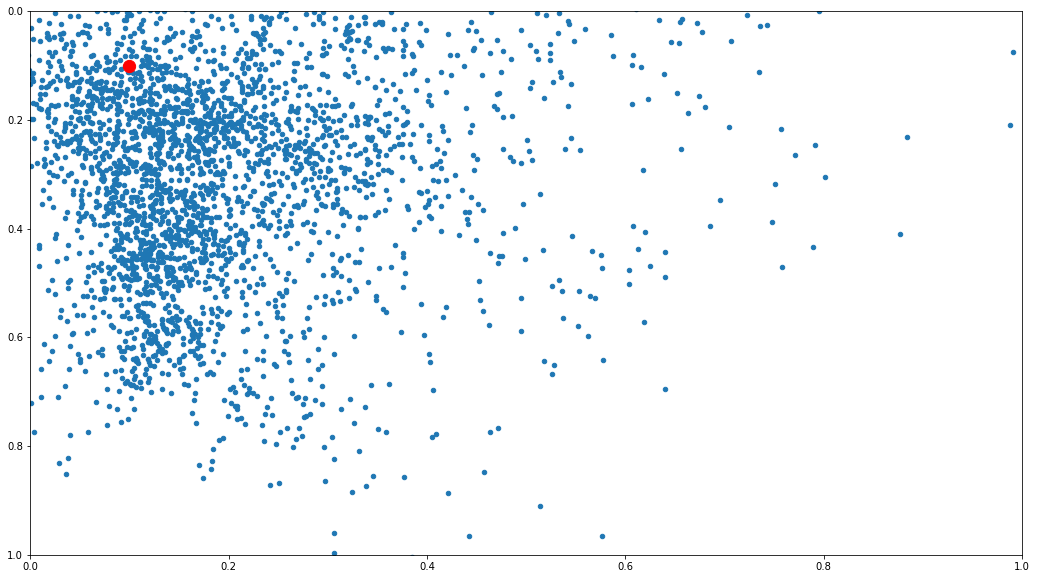

In [35]:
xrr, yrr, mse_arr, counter = multisession
print(xrr.shape, yrr.shape, counter)
print(mse_arr)
scle = 10
plt.rcParams["figure.figsize"] = (scle*16/9,scle)
plt.scatter(xrr, yrr, scle*2)
plt.xlim([0,1])
plt.ylim([0,1])
plt.gca().invert_yaxis()
plt.scatter(marker_track["Position 2"][0], marker_track["Position 2"][1], color='red', s=scle*15)

# Pairwise MSE analysis by focus position

In [36]:
def set_box_color(bp, color):
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color=color)

def plotBoxCompare(data_left, data_right, label_left, label_right, x_axis_label, color_left='#D7191C', color_right='#2C7BB6', fill_left='#f3a5a9', fill_right='#add0eb'):
    # bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.4)
    # bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.4)
    bpl = plt.boxplot(data_left, positions=np.array(range(1))*2.0-0.4, sym='', widths=0.4, 
                        whiskerprops = dict(linestyle='--', linewidth=2),
                        medianprops = dict(linewidth=6),
                        meanprops = dict(linestyle='--', linewidth=2),
                        boxprops = dict(linestyle='-', linewidth=2),
                        capprops = dict(linestyle='-', linewidth=2), patch_artist=True)

    bpr = plt.boxplot(data_right, positions=np.array(range(1))*2.0+0.4, sym='', widths=0.4,
                        whiskerprops = dict(linestyle='--', linewidth=2),
                        medianprops = dict(linewidth=6),
                        meanprops = dict(linestyle='--', linewidth=2),
                        boxprops = dict(linestyle='-', linewidth=2),
                        capprops = dict(linestyle='-', linewidth=2), patch_artist=True)

    set_box_color(bpl, color_left) # colors are from http://colorbrewer2.org/
    set_box_color(bpr, color_right)

    for patch in bpl['boxes']:
        patch.set(facecolor = fill_left)
    for patch in bpr['boxes']:
        patch.set(facecolor = fill_right)

    # draw temporary red and blue lines and use them to create a legend
    plt.legend([bpl["boxes"][0], bpr["boxes"][0]], [label_left, label_right])

    ticks = [x_axis_label]
    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xlim(-2, len(ticks)*2)
    # plt.ylim(0, 8)
    plt.ylabel("Mean Square Error", fontsize=16)
    plt.tight_layout()
    # plt.savefig('boxcompare.png')

In [43]:
# position = "Position 3"
left = loadjson__multileSession(list(marker_track.keys()), _filter = {"glass": 0, "gender": -1, "brightness": -1, "camera_res": -1})
right = loadjson__multileSession(list(marker_track.keys()), _filter = {"glass": 1, "gender": -1, "brightness": -1, "camera_res": -1})

session_2021-10-04T02%3a35%3a57.883970.json session has 2 ids
session_2021-10-05T00%3a42%3a54.533873.json session has 0 ids
session_2021-10-02T09%3a45%3a34.906832.json session has 2 ids
session_2021-10-04T02%3a36%3a38.093949.json session has 2 ids
session_2021-10-02T05%3a09%3a58.567128.json session has 0 ids
session_2021-10-04T02%3a37%3a28.882140.json session has 2 ids
session_2021-10-04T02%3a37%3a58.236169.json session has 0 ids
session_2021-10-04T02%3a38%3a38.579804.json session has 2 ids
session_2021-10-04T02%3a38%3a59.868238.json session has 2 ids
session_2021-10-04T02%3a39%3a27.579842.json session has 2 ids
session_2021-10-04T02%3a39%3a47.933114.json session has 2 ids
session_2021-10-04T02%3a40%3a07.729511.json session has 2 ids
Found 177 participants >> Combined shape (34280,) (34280,)
session_2021-10-05T08%3a35%3a35.317479.json session has 2 ids
session_2021-10-02T10%3a11%3a51.061924.json session has 2 ids
session_2021-10-05T08%3a56%3a54.162246.json session has 2 ids
session_202

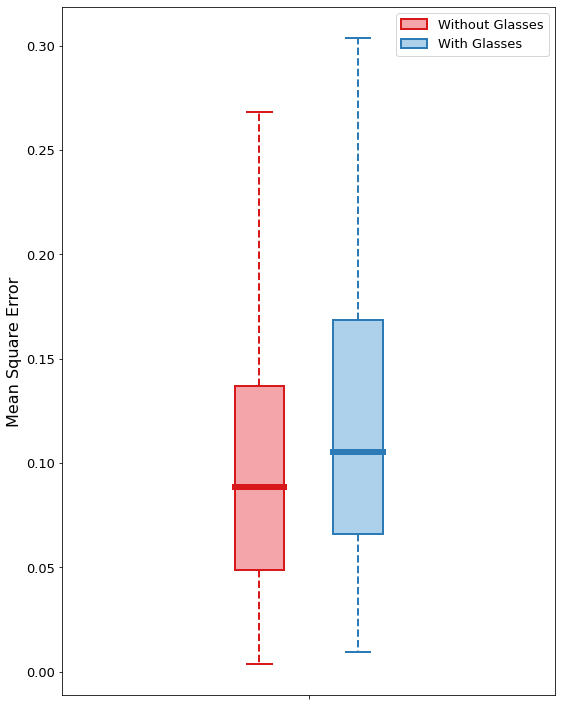

In [45]:
plt.rcParams["figure.figsize"] = (8, 10)
plt.rcParams.update({'font.size': 13})
plotBoxCompare(left[2], right[2], "Without Glasses", "With Glasses", "")

In [48]:
position = "Position 3"
left = loadjson__multileSession(position)

session_2021-10-02T05%3a09%3a58.567128.json session has 0 ids
session_2021-10-04T02%3a37%3a28.882140.json session has 2 ids
Found 30 participants >> Combined shape (5722,) (5722,)


>>>>>>>>>>>> Position 1
session_2021-10-05T08%3a35%3a35.317479.json session has 2 ids
Found 13 participants >> Combined shape (2646,) (2646,)
session_2021-10-04T02%3a35%3a57.883970.json session has 2 ids
session_2021-10-05T00%3a42%3a54.533873.json session has 0 ids
Found 14 participants >> Combined shape (3382,) (3382,)
>>>>>>>>>>>> Position 2
session_2021-10-02T09%3a45%3a34.906832.json session has 2 ids
Found 13 participants >> Combined shape (2408,) (2408,)
session_2021-10-04T02%3a36%3a38.093949.json session has 2 ids
session_2021-10-05T08%3a56%3a54.162246.json session has 2 ids
Found 15 participants >> Combined shape (3122,) (3122,)
>>>>>>>>>>>> Position 3
Found 13 participants >> Combined shape (2164,) (2164,)
session_2021-10-02T05%3a09%3a58.567128.json session has 0 ids
session_2021-10-04T02%3a37%3a28.882140.json session has 2 ids
Found 14 participants >> Combined shape (2963,) (2963,)
>>>>>>>>>>>> Position 4
Found 13 participants >> Combined shape (2659,) (2659,)
session_2021-10-

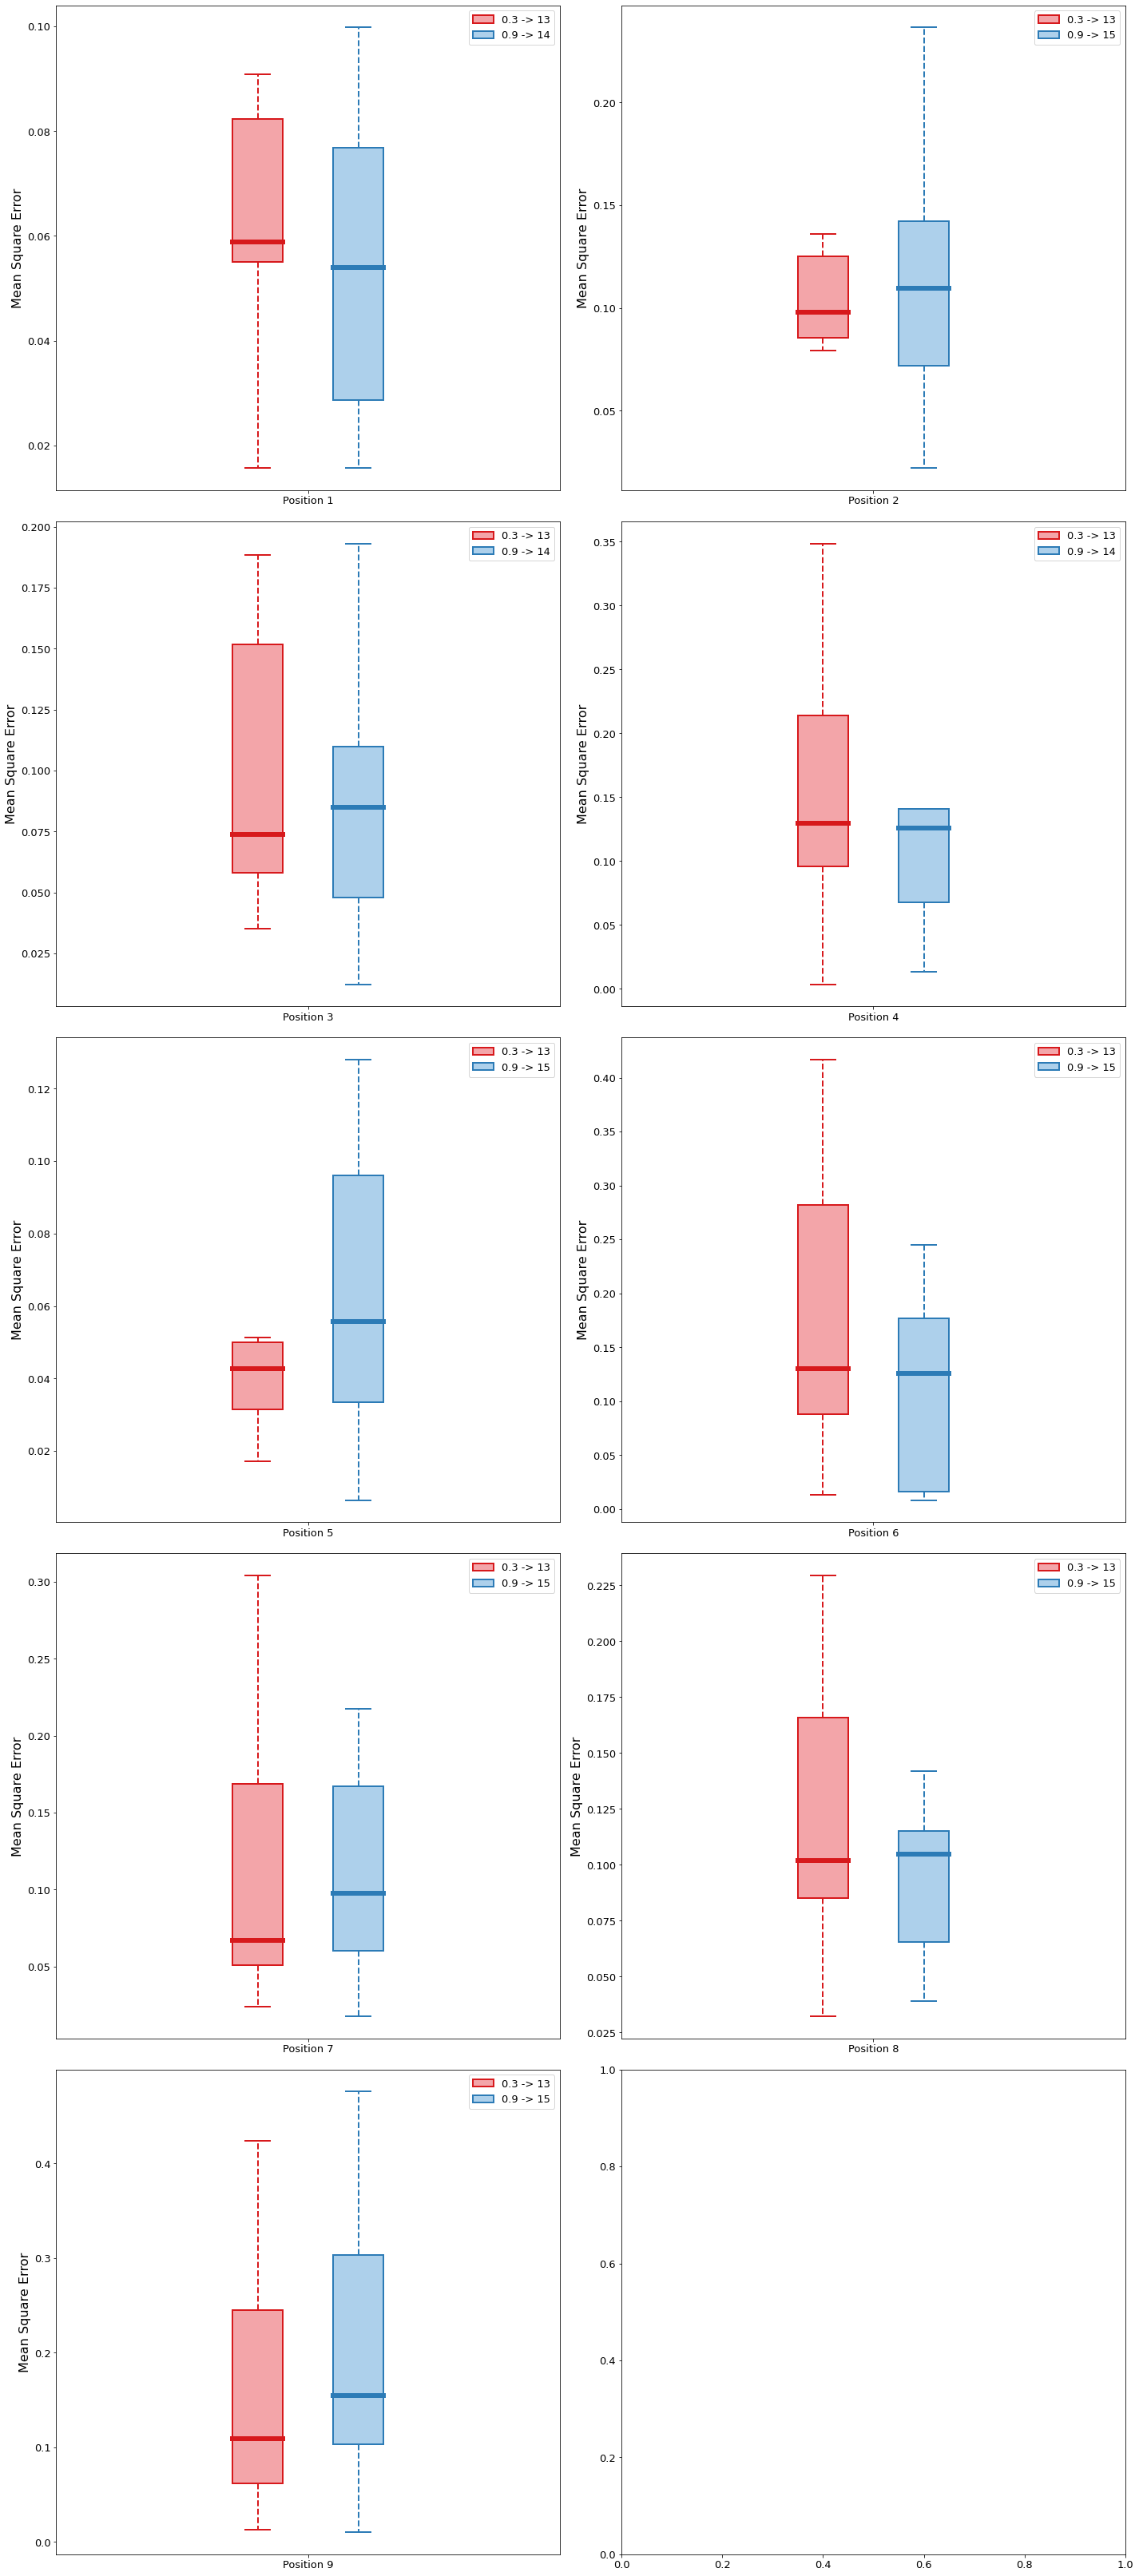

In [38]:
pos_counts = 9
plt.rcParams["figure.figsize"] = (20, 5*pos_counts)
color_left = '#D7191C'
color_right = '#2C7BB6'
fill_left = '#f3a5a9'
fill_right = '#add0eb'
###########################################################################################################################################

fig, ax = plt.subplots(nrows=5, ncols=2)

counter = 0
for position in marker_track:
    print(">>>>>>>>>>>> " + position)
    left = loadjson__multileSession(position, _filter = {"glass": -1, "gender": -1, "brightness": -1, "camera_res": 0.3})
    right = loadjson__multileSession(position, _filter = {"glass": -1, "gender": -1, "brightness": -1, "camera_res": 0.9})
    label_left = "0.3 -> {}".format(left[3])
    label_right = "0.9 -> {}".format(right[3])

    sub_plot = ax[counter//2, counter%2]

    bpl = sub_plot.boxplot(left[2], positions=np.array(range(1))*2.0-0.4, sym='', widths=0.4, 
                        whiskerprops = dict(linestyle='--', linewidth=2),
                        medianprops = dict(linewidth=6),
                        meanprops = dict(linestyle='--', linewidth=2),
                        boxprops = dict(linestyle='-', linewidth=2),
                        capprops = dict(linestyle='-', linewidth=2), patch_artist=True)

    bpr = sub_plot.boxplot(right[2], positions=np.array(range(1))*2.0+0.4, sym='', widths=0.4,
                        whiskerprops = dict(linestyle='--', linewidth=2),
                        medianprops = dict(linewidth=6),
                        meanprops = dict(linestyle='--', linewidth=2),
                        boxprops = dict(linestyle='-', linewidth=2),
                        capprops = dict(linestyle='-', linewidth=2), patch_artist=True)

    set_box_color(bpl, color_left) # colors are from http://colorbrewer2.org/
    set_box_color(bpr, color_right)

    for patch in bpl['boxes']:
        patch.set(facecolor = fill_left)
    for patch in bpr['boxes']:
        patch.set(facecolor = fill_right)

    # draw temporary red and blue lines and use them to create a legend
    sub_plot.legend([bpl["boxes"][0], bpr["boxes"][0]], [label_left, label_right])

    ticks = [position]
    plt.sca(sub_plot)
    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    sub_plot.set_xlim(-2, len(ticks)*2)
    # plt.ylim(0, 1)
    sub_plot.set_ylabel("Mean Square Error", fontsize=16)
    # sub_plot.set_tight_layout()

    counter += 1

    # if(counter == 2):
    #     break

fig.tight_layout()
plt.show()